In [1]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with your file name)
df = pd.read_csv('flight_data.csv')

# Count the number of null values in each column
null_values = df.isnull().sum()

# Display the number of null values for each column
print(null_values)


year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('flight_data.csv')

# Ensure dep_time and sched_dep_time are numeric
df['dep_time'] = pd.to_numeric(df['dep_time'], errors='coerce')
df['sched_dep_time'] = pd.to_numeric(df['sched_dep_time'], errors='coerce')

# Remove rows where dep_time is NaN (canceled flights)
df = df[pd.notnull(df['dep_time'])]

# Function to round dep_time
def round_dep_time(dep_time):
    minutes = dep_time % 100
    if minutes >= 30:
        return (dep_time // 100 + 1) * 100  # Round up
    else:
        return (dep_time // 100) * 100  # Round down

# Apply rounding function to dep_time
df['dep_time'] = df['dep_time'].apply(round_dep_time)

# Create the target variable 'delayed'
df['delayed'] = df.apply(
    lambda row: 1 if row['dep_time'] > row['sched_dep_time'] else 0,
    axis=1
)

# Filter the rows where the origin is EWR, LGA, or JFK
filtered_df = df[df['origin'].isin(['EWR', 'LGA', 'JFK'])]

# Extract the required columns
filtered_df = filtered_df[['year', 'month', 'day', 'dep_time', 'carrier', 'origin', 'dest', 'delayed']]

# Convert numerical columns to integers where applicable (ensure they're numeric)
filtered_df['year'] = filtered_df['year'].astype(int)
filtered_df['month'] = filtered_df['month'].astype(int)
filtered_df['day'] = filtered_df['day'].astype(int)
filtered_df['dep_time'] = filtered_df['dep_time'].astype(int)
filtered_df['delayed'] = filtered_df['delayed'].astype(int)

# Ensure 'carrier', 'origin', and 'dest' are treated as strings
filtered_df['carrier'] = filtered_df['carrier'].astype(str)
filtered_df['origin'] = filtered_df['origin'].astype(str)
filtered_df['dest'] = filtered_df['dest'].astype(str)

# Save the filtered dataset to a new CSV file
filtered_df.to_csv('processed_flight_data.csv', index=False)

# Print a message indicating the file has been saved
print("Filtered dataset with delay information saved as 'processed_flight_data.csv'")


Filtered dataset with delay information saved as 'processed_flight_data.csv'


In [3]:
correlation = df['dep_delay'].corr(df['arr_delay'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.9148027588556938


In [4]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with your file name)
df = pd.read_csv('processed_flight_data.csv')

# Count the number of null values in each column
null_values = df.isnull().sum()

# Display the number of null values for each column
print(null_values)

year        0
month       0
day         0
dep_time    0
carrier     0
origin      0
dest        0
delayed     0
dtype: int64


In [5]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with your file name)
df = pd.read_csv('weather.csv')

# Count the number of null values in each column
null_values = df.isnull().sum()

# Display the number of null values for each column
print(null_values)

origin           0
year             0
month            0
day              0
hour             0
temp             1
dewp             1
humid            1
wind_dir       418
wind_speed       3
wind_gust        3
precip           0
pressure      2730
visib            0
time_hour        0
dtype: int64


In [6]:
import pandas as pd

# Load the weather dataset
weather_df = pd.read_csv('weather.csv')

# Extract the required columns: year, month, day, hour, temp, dewp, humid, wind_speed, pressure, visib
weather_df = weather_df[['origin','year', 'month', 'day', 'hour', 'temp', 'dewp', 'humid', 'wind_speed', 'visib']]

# Convert the hour to hours and minutes format
weather_df['hour'] = weather_df['hour'].apply(lambda x: int(x * 100))

# Rename the hour column to dep_time
weather_df.rename(columns={'hour': 'dep_time'}, inplace=True)

# Save the transformed dataset to a new CSV file
weather_df.to_csv('Processed_weather_data.csv', index=False)

# Print a message indicating the file has been saved
print("Filtered weather dataset saved as 'Processed_weather_data.csv'")


Filtered weather dataset saved as 'Processed_weather_data.csv'


In [7]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with your file name)
df = pd.read_csv('Processed_weather_data.csv')

# Count the number of null values in each column
null_values = df.isnull().sum()

# Display the number of null values for each column
print(null_values)

origin        0
year          0
month         0
day           0
dep_time      0
temp          1
dewp          1
humid         1
wind_speed    3
visib         0
dtype: int64


In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv('processed_weather_data.csv')

# Fill the missing values for continuous numerical columns with the median (you could also use mean if preferred)
df['temp'] = df['temp'].fillna(df['temp'].median())
df['dewp'] = df['dewp'].fillna(df['dewp'].median())
df['humid'] = df['humid'].fillna(df['humid'].median())
df['wind_speed'] = df['wind_speed'].fillna(df['wind_speed'].median())

# Save the cleaned dataset to a new CSV file
df.to_csv('Processed_weather_data.csv', index=False)

# Print a message indicating the file has been saved
print("Cleaned dataset with handled null values saved as 'Processed_weather_data.csv'")


Cleaned dataset with handled null values saved as 'Processed_weather_data.csv'


In [9]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with your file name)
df = pd.read_csv('Processed_weather_data.csv')

# Count the number of null values in each column
null_values = df.isnull().sum()

# Display the number of null values for each column
print(null_values)

origin        0
year          0
month         0
day           0
dep_time      0
temp          0
dewp          0
humid         0
wind_speed    0
visib         0
dtype: int64


In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv('processed_flight_data.csv')

# Check the data types of all features
print(df.dtypes)


year         int64
month        int64
day          int64
dep_time     int64
carrier     object
origin      object
dest        object
delayed      int64
dtype: object


In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv('processed_weather_data.csv')

# Check the data types of all features
print(df.dtypes)

origin         object
year            int64
month           int64
day             int64
dep_time        int64
temp          float64
dewp          float64
humid         float64
wind_speed    float64
visib         float64
dtype: object


In [12]:
import pandas as pd

# Load the datasets
flights_df = pd.read_csv('processed_flight_data.csv')
weather_df = pd.read_csv('processed_weather_data.csv')

# Merge the two datasets on the common columns
result_df = pd.merge(flights_df, weather_df, on=['year', 'month', 'day', 'dep_time', 'origin'], how='inner')

# Reorder columns to place 'delayed' at the end
columns_order = [col for col in result_df.columns if col != 'delayed'] + ['delayed']
result_df = result_df[columns_order]

# Save the result to a new CSV file
result_df.to_csv('flight_weather_data.csv', index=False)

# Print a message indicating the file has been saved
print("Merged dataset saved as 'flight_weather_data.csv'")

Merged dataset saved as 'flight_weather_data.csv'


In [13]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with your file name)
df = pd.read_csv('flight_weather_data.csv')

# Count the number of null values in each column
null_values = df.isnull().sum()

# Display the number of null values for each column
print(null_values)

year          0
month         0
day           0
dep_time      0
carrier       0
origin        0
dest          0
temp          0
dewp          0
humid         0
wind_speed    0
visib         0
delayed       0
dtype: int64


In [14]:
import pandas as pd

# Load the dataset
df = pd.read_csv('flight_weather_data.csv')

# Get unique carrier, origin, and destination names
carriers = df['carrier'].unique()
origins = df['origin'].unique()
destinations = df['dest'].unique()

# Get the total number of unique carriers, origins, and destinations
num_carriers = df['carrier'].nunique()
num_origins = df['origin'].nunique()
num_destinations = df['dest'].nunique()

# Display the results
print("Carriers:", carriers)
print("Origins:", origins)
print("Destinations:", destinations)
print("\nTotal number of unique carriers:", num_carriers)
print("Total number of unique origins:", num_origins)
print("Total number of unique destinations:", num_destinations)


Carriers: ['UA' 'AA' 'B6' 'DL' 'EV' 'MQ' 'US' 'WN' 'VX' 'FL' 'AS' '9E' 'F9' 'HA'
 'YV' 'OO']
Origins: ['LGA' 'JFK' 'EWR']
Destinations: ['IAH' 'MIA' 'BQN' 'ATL' 'ORD' 'FLL' 'IAD' 'MCO' 'PBI' 'TPA' 'LAX' 'SFO'
 'DFW' 'BOS' 'LAS' 'MSP' 'DTW' 'RSW' 'SJU' 'PHX' 'BWI' 'CLT' 'BUF' 'DEN'
 'SNA' 'MSY' 'SLC' 'XNA' 'MKE' 'SEA' 'ROC' 'SYR' 'SRQ' 'RDU' 'CMH' 'JAX'
 'CHS' 'MEM' 'PIT' 'SAN' 'DCA' 'CLE' 'STL' 'MYR' 'JAC' 'MDW' 'HNL' 'BNA'
 'AUS' 'BTV' 'PHL' 'STT' 'EGE' 'AVL' 'PWM' 'IND' 'SAV' 'CAK' 'HOU' 'LGB'
 'DAY' 'ALB' 'BDL' 'MHT' 'MSN' 'GSO' 'CVG' 'BUR' 'RIC' 'GSP' 'GRR' 'MCI'
 'ORF' 'SAT' 'SDF' 'PDX' 'SJC' 'OMA' 'CRW' 'OAK' 'SMF' 'TUL' 'TYS' 'OKC'
 'PVD' 'DSM' 'BHM' 'CAE' 'PSE' 'HDN' 'BZN' 'MTJ' 'EYW' 'PSP' 'ACK' 'BGR'
 'ABQ' 'ILM' 'MVY' 'SBN' 'LEX' 'CHO' 'TVC' 'ANC']

Total number of unique carriers: 16
Total number of unique origins: 3
Total number of unique destinations: 104


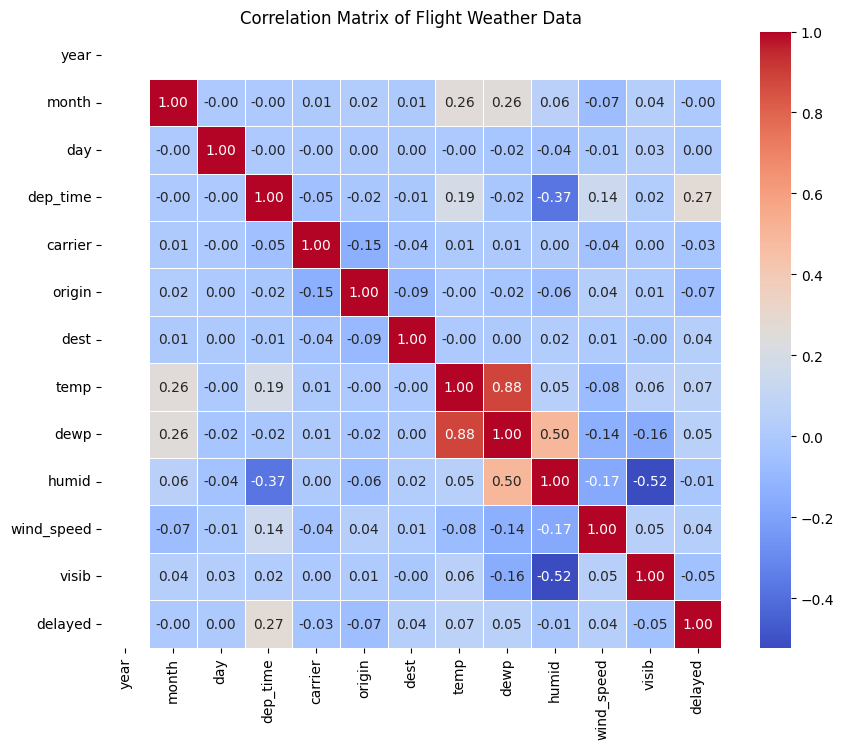

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('flight_weather_data.csv')

# Convert object columns to numeric values using encoding (you can also use OneHotEncoding if needed)
df_encoded = df.copy()

# Encoding categorical features (carrier, origin, and dest)
df_encoded['carrier'] = df_encoded['carrier'].astype('category').cat.codes
df_encoded['origin'] = df_encoded['origin'].astype('category').cat.codes
df_encoded['dest'] = df_encoded['dest'].astype('category').cat.codes

# Calculate correlation matrix
corr_matrix = df_encoded.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix of Flight Weather Data')
plt.show()

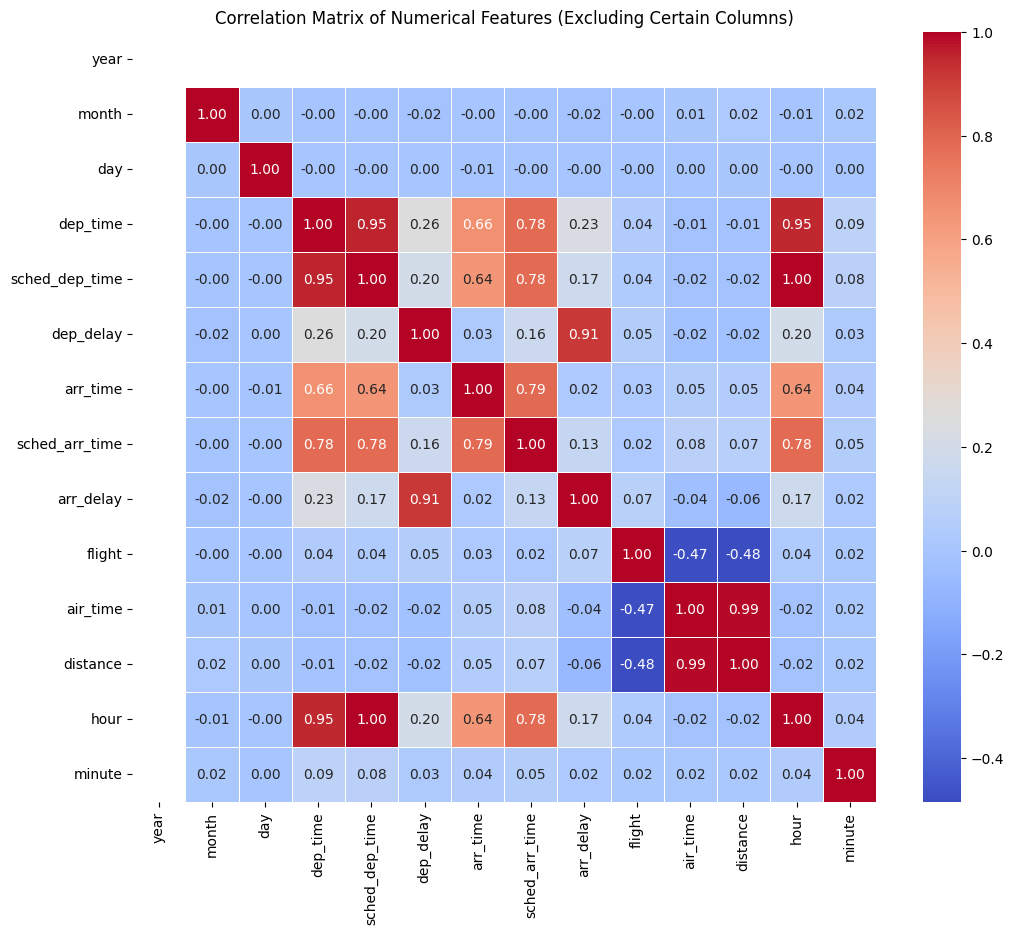

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('flight_data.csv')

# Drop the specified columns
columns_to_exclude = ['carrier', 'tailnum', 'origin', 'dest', 'time_hour']
df_filtered = df.drop(columns=columns_to_exclude)

# Calculate the correlation matrix
corr_matrix = df_filtered.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features (Excluding Certain Columns)')
plt.show()

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Load the dataset
df = pd.read_csv('flight_weather_data.csv')

# Separate features (X) and target (y)
X = df.drop('delayed', axis=1)  # Features (all columns except 'delayed')
y = df['delayed']  # Target variable

# Define categorical columns
categorical_cols = ['carrier', 'origin', 'dest']

# Define the transformer for categorical columns (One-Hot Encoding)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep the other columns as they are
)

# Create a pipeline that first applies the preprocessor and then trains the model
classifier = DecisionTreeClassifier(random_state=42)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Extract feature importance
# Get the feature names from the preprocessor
encoded_feature_names = pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_cols)
numeric_feature_names = [col for col in X.columns if col not in categorical_cols]
all_feature_names = np.append(encoded_feature_names, numeric_feature_names)

# Get feature importances
feature_importances = pipeline.named_steps['classifier'].feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display feature importances
print("\nFeature Importances:")
print(feature_importance_df)


Accuracy: 0.8647
Precision: 0.8690
Recall: 0.8631
F1 Score: 0.8660
Confusion Matrix:
[[27865  4300]
 [ 4522 28515]]

Feature Importances:
        Feature  Importance
125    dep_time    0.226411
123       month    0.123525
126        temp    0.044578
128       humid    0.040267
124         day    0.039456
..          ...         ...
10   carrier_OO    0.000034
104    dest_SBN    0.000014
93     dest_PSE    0.000000
94     dest_PSP    0.000000
122        year    0.000000

[131 rows x 2 columns]


In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
df = pd.read_csv("flight_weather_data.csv")

# Separate features (X) and target (y)
X = df.drop('delayed', axis=1)  # Features (all columns except 'delayed')
y = df['delayed']  # Target variable

# Handle missing values
# For numeric columns, use the median
numeric_cols = X.select_dtypes(include=['number']).columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())

# For categorical columns, use the mode
categorical_cols = ['carrier', 'origin', 'dest']
X[categorical_cols] = X[categorical_cols].fillna(X[categorical_cols].mode().iloc[0])

# Handle categorical features with one-hot encoding
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Normalize the feature columns using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape the input data to 3D (samples, time steps, features) for LSTM
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),  # Input layer without using input_shape argument
    LSTM(64, activation='tanh', return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='tanh', return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=70,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()  # Convert probabilities to binary classes

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))


Epoch 1/70
8151/8151 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step - accuracy: 0.6525 - loss: 0.6116 - val_accuracy: 0.6974 - val_loss: 0.5576
Epoch 2/70
8151/8151 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - accuracy: 0.7052 - loss: 0.5506 - val_accuracy: 0.7349 - val_loss: 0.5149
Epoch 3/70
8151/8151 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - accuracy: 0.7347 - loss: 0.5180 - val_accuracy: 0.7586 - val_loss: 0.4806
Epoch 4/70
8151/8151 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - accuracy: 0.7520 - loss: 0.4915 - val_accuracy: 0.7796 - val_loss: 0.4521
Epoch 5/70
8151/8151 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - accuracy: 0.7669 - loss: 0.4704 - val_accuracy: 0.7853 - val_loss: 0.4385
Epoch 6/70
8151/8151 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - accuracy: 0.7780 - loss: 0.4516 - val_accuracy: 0.8010 - val_loss: 0.4161
Epoch 7/70
8151/8151 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.7897 - loss: 0.4367 - val_accuracy: 0.8128 - val_loss: 0.3997
Epoch 8/70
8151/8151 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - accuracy: 0.7966 - loss: 0

GRU

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
df = pd.read_csv("flight_weather_data.csv")

# Separate features (X) and target (y)
X = df.drop('delayed', axis=1)  # Features (all columns except 'delayed')
y = df['delayed']  # Target variable

# Handle missing values
# For numeric columns, use the median
numeric_cols = X.select_dtypes(include=['number']).columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())

# For categorical columns, use the mode
categorical_cols = ['carrier', 'origin', 'dest']
X[categorical_cols] = X[categorical_cols].fillna(X[categorical_cols].mode().iloc[0])

# Handle categorical features with one-hot encoding
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Normalize the feature columns using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape the input data to 3D (samples, time steps, features) for GRU
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the GRU model
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),  # Input layer without using input_shape argument
    GRU(64, activation='tanh', return_sequences=True),  # GRU layer instead of LSTM
    Dropout(0.2),
    GRU(32, activation='tanh', return_sequences=False),  # GRU layer instead of LSTM
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=60,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()  # Convert probabilities to binary classes

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

Epoch 1/60
8151/8151 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - accuracy: 0.6445 - loss: 0.6181 - val_accuracy: 0.6963 - val_loss: 0.5616
Epoch 2/60
8151/8151 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.7000 - loss: 0.5600 - val_accuracy: 0.7368 - val_loss: 0.5187
Epoch 3/60
8151/8151 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.7271 - loss: 0.5293 - val_accuracy: 0.7560 - val_loss: 0.4907
Epoch 4/60
8151/8151 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.7471 - loss: 0.5032 - val_accuracy: 0.7746 - val_loss: 0.4660
Epoch 5/60
8151/8151 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.7594 - loss: 0.4854 - val_accuracy: 0.7857 - val_loss: 0.4478
Epoch 6/60
8151/8151 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.7708 - loss: 0.4689 - val_accuracy: 0.7962 - val_loss: 0.4312
Epoch 7/60
8151/8151 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.7767 - loss: 0.4587 - val_accuracy: 0.8005 - val_loss: 0.4208
Epoch 8/60
8151/8151 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.7821 - loss: 0

RNN

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Load the dataset
df = pd.read_csv("flight_weather_data.csv")

# Separate features (X) and target (y)
X = df.drop('delayed', axis=1)  # Features (all columns except 'delayed')
y = df['delayed']  # Target variable

# Handle missing values
numeric_cols = X.select_dtypes(include=['number']).columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())
categorical_cols = ['carrier', 'origin', 'dest']
X[categorical_cols] = X[categorical_cols].fillna(X[categorical_cols].mode().iloc[0])

# Handle categorical features with one-hot encoding
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Normalize the feature columns using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape the input data to 3D (samples, time steps, features) for RNN
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))  # 1 time step per sample

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the RNN model
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),  # Input layer without using input_shape argument
    SimpleRNN(64, activation='tanh', return_sequences=True),  # RNN layer
    Dropout(0.2),
    SimpleRNN(32, activation='tanh', return_sequences=False),  # RNN layer
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=60,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()  # Convert probabilities to binary classes

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))


Epoch 1/60
8151/8151 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.6309 - loss: 0.6327 - val_accuracy: 0.6845 - val_loss: 0.5803
Epoch 2/60
8151/8151 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.6803 - loss: 0.5851 - val_accuracy: 0.7051 - val_loss: 0.5547
Epoch 3/60
8151/8151 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.6942 - loss: 0.5697 - val_accuracy: 0.7183 - val_loss: 0.5365
Epoch 4/60
8151/8151 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.7085 - loss: 0.5539 - val_accuracy: 0.7333 - val_loss: 0.5184
Epoch 5/60
8151/8151 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.7166 - loss: 0.5433 - val_accuracy: 0.7455 - val_loss: 0.5040
Epoch 6/60
8151/8151 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.7206 - loss: 0.5357 - val_accuracy: 0.7516 - val_loss: 0.4959
Epoch 7/60
8151/8151 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.7249 - loss: 0.5285 - val_accuracy: 0.7606 - val_loss: 0.4839
Epoch 8/60
8151/8151 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.7332 - loss: 0

*** Among the all we got the highest accuracy for the lstm so now we are creating the lstm model 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import joblib  # For saving scaler and model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
df = pd.read_csv("flight_weather_data.csv")

# Separate features (X) and target (y)
X = df.drop('delayed', axis=1)  # Features (all columns except 'delayed')
y = df['delayed']  # Target variable

# Handle missing values
# For numeric columns, use the median
numeric_cols = X.select_dtypes(include=['number']).columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())

# For categorical columns, use the mode
categorical_cols = ['carrier', 'origin', 'dest']
X[categorical_cols] = X[categorical_cols].fillna(X[categorical_cols].mode().iloc[0])

# Handle categorical features with one-hot encoding
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Normalize the feature columns using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save the scaler to a file
joblib.dump(scaler, "scaler.pkl")
print("Scaler saved to scaler.pkl")

# Reshape the input data to 3D (samples, time steps, features) for LSTM
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),  # Input layer without using input_shape argument
    LSTM(64, activation='tanh', return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='tanh', return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=70,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Save the trained model
save_model(model, "flight_delay_model.h5")
print("Model saved to flight_delay_model.h5")

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()  # Convert probabilities to binary classes

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

Scaler saved to scaler.pkl
Epoch 1/70
8151/8151 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.6489 - loss: 0.6133 - val_accuracy: 0.6984 - val_loss: 0.5576
Epoch 2/70
8151/8151 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.7028 - loss: 0.5522 - val_accuracy: 0.7313 - val_loss: 0.5204
Epoch 3/70
8151/8151 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.7304 - loss: 0.5209 - val_accuracy: 0.7545 - val_loss: 0.4886
Epoch 4/70
8151/8151 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.7481 - loss: 0.4974 - val_accuracy: 0.7712 - val_loss: 0.4660
Epoch 5/70
8151/8151 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.7615 - loss: 0.4789 - val_accuracy: 0.7850 - val_loss: 0.4437
Epoch 6/70
8151/8151 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.7740 - loss: 0.4607 - val_accuracy: 0.7957 - val_loss: 0.4287
Epoch 7/70
8151/8151 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.7815 - loss: 0.4475 - val_accuracy: 0.8024 - val_loss: 0.4137
Epoch 8/70
8151/8151 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step -

Model saved to flight_delay_model.h5
2038/2038 ━━━━━━━━━━━━━━━━━━━━ 2s 997us/step
Accuracy: 0.8891

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     32165
           1       0.90      0.88      0.89     33037

    accuracy                           0.89     65202
   macro avg       0.89      0.89      0.89     65202
weighted avg       0.89      0.89      0.89     65202


Confusion Matrix:
[[28968  3197]
 [ 4033 29004]]
